# 2005.A

## 题干

### 水污染背景
  水是人类赖以生存的资源，保护水资源就是保护我们自己，对于我国大江大河水资源的保护和治理应是重中之重。专家们呼吁：“以人为本，建设文明和谐社会，改善人与自然的环境，减少污染。” 

  长江是我国第一、世界第三大河流，长江水质的污染程度日趋严重，已引起了相关政府部门和专家们的高度重视。2004年10月，由全国政协与中国发展研究院联合组成“保护长江万里行”考察团，从长江上游宜宾到下游上海，对沿线21个重点城市做了实地考察，揭示了一幅长江污染的真实画面，其污染程度让人触目惊心。为此，专家们提出“若不及时拯救，长江生态10年内将濒临崩溃”（附件１），并发出了“拿什么拯救癌变长江”的呼唤（附件2）。

### 数据方面
  附件3给出了长江沿线17个观测站（地区）近两年多主要水质指标的检测数据，以及干流上７个观测站近一年多的基本数据（站点距离、水流量和水流速）。通常认为一个观测站（地区）的水质污染主要来自于本地区的排污和上游的污水。一般说来，江河自身对污染物都有一定的自然净化能力，即污染物在水环境中通过物理降解、化学降解和生物降解等使水中污染物的浓度降低。反映江河自然净化能力的指标称为**降解系数**。事实上，长江干流的自然净化能力可以认为是**近似均匀**的，根据检测可知，主要污染物**高锰酸盐指数**和**氨氮的降解系数**通常介于0.1-0.5之间，比如可以考虑取0.2　(单位：1/天)。附件4是“1995~2004年长江流域水质报告”给出的主要统计数据。下面的附表是国标(GB3838-2002) 给出的《地表水环境质量标准》中4个主要项目标准限值，其中Ⅰ、Ⅱ、Ⅲ类为可饮用水。

  请你们研究下列问题：

1. 对长江近两年多的水质情况做出定量的综合评价，并分析各地区水质的污染状况。
2. 研究、分析长江干流近一年多主要污染物高锰酸盐指数和氨氮的污染源主要在哪些地区?
3. 假如不采取更有效的治理措施，依照过去10年的主要统计数据，对长江未来水质污染的发展趋势做出预测分析，比如研究未来10年的情况。
4. 根据你的预测分析，如果未来10年内每年都要求长江干流的Ⅳ类和Ⅴ类水的比例控制在20%以内，且没有劣Ⅴ类水,那么每年需要处理多少污水？ 
5. 你对解决长江水质污染问题有什么切实可行的建议和意见。

# 第一题
是对近两年多的水质情况做出定量综合评价，并分析各地区水质的污染状况，首先我们先看附录的数据，理一下数据分别含有什么：

## 附录3

1. 长江流域主要城市水质检测报告，其中包含了点位名称、断面情况、主要检测项目（单位是mg/L，包括了pH/DO/CODMn等指标）、水质类别和主要污染指标
2. 长江干流主要观测站点的基本数据，主要给出了7个观测站点从2004年4月到2005年4月这12个月间的水流量和水流速

## 附录4

给出了从1995年到2004年长江流域水质的报告，时段上分为枯水期、丰水期和水文年，从分别从全流域、干流、支流划分成6个污染等级，统计了不同污染等级的河流的长度和所占比例

有了数据，再来看题目的两个问题：
1. 对两年多的水质情况做出定量综合评价
2. 对各地区水质的污染状况进行分析

我们先来看第一个问题，对两年多的水质情况做出定量综合评价，结合题干的*附件3给出了长江沿线17个观测站（地区）近两年多主要水质指标的检测数据*，我们首先需要获取附件3的表格

In [27]:
import os
for dirname, _, filenames in os.walk('.\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

#忽略警告
import warnings
warnings.filterwarnings('ignore')

.\datasets\data1.doc
.\datasets\data2.doc
.\datasets\data3.doc
.\datasets\data4.doc
.\datasets\lDVIN8bR8e15eb91fee262ef52b097c69db67cda.doc
.\datasets\~$data1.doc
.\datasets\~$data3.doc


我们需要读取data3.doc中的表格，但是这个表格是word内置的，得想办法提取出来，问问chatgpt，得到一个读取doc中表格为df格式的代码，但是得到的代码都不能用，因此先将doc文件转换为csv文件先，但是gpt给的代码基本都用不了，暂时想不明白原因，使用CSDN的这段代码：

https://blog.csdn.net/qq_34464926/article/details/104182736

In [29]:
from docx import Document
import csv


### 这里首先要用WPS Office的“另存为”功能将doc文件转为docx文件
docFile = r'.\datasets\data1.docx'
document = Document(docFile)  # 读入文件
tables = document.tables  # 获取文件中的表格集

data = []
for table in tables:
    for i, row in enumerate(table.rows):  # 读每行
        row_content = []
        for cell in row.cells:  # 读一行中的所有单元格
            c = cell.text
            row_content.append(c.replace("\n", "").replace("\r", "").strip())
        data.append(row_content)

def data_write_csv(file_name, datas):  # file_name为写入CSV文件的路径，datas为要写入数据列表
    with open(file_name, 'w', newline='', encoding='utf-8') as file_csv:
        writer = csv.writer(file_csv)
        for data in datas:
            writer.writerow(data)
        print("保存文件成功，处理结束")

data_write_csv(r".\datasets\data1.csv", data)

保存文件成功，处理结束


In [31]:
### 接下来要将csv文件存入df中
import pandas as pd

csv_file_path = r".\datasets\data1.csv"  # Replace with your CSV file path
dataframe = pd.read_csv(csv_file_path)

print(dataframe)

          序号     点位名称        断面情况 主要监测项目(单位:mg/L) 主要监测项目(单位:mg/L).1  \
0         序号     点位名称        断面情况             pH*                DO   
1          1    四川攀枝花          干流             7.6               6.8   
2          2     重庆朱沱   干流（川-渝省界）            7.63              8.41   
3          3  湖北宜昌南津关  干流（三峡水库出口）            7.07              7.81   
4          4  湖南岳阳城陵矶          干流            7.58              6.47   
..       ...      ...         ...             ...               ...   
554  2005.02      水流速         2.0             1.0               0.4   
555  2005.03      水流量         623            4740              5180   
556  2005.03      水流速         1.9             0.9               0.4   
557  2005.04      水流量         642            3650              5400   
558  2005.04      水流速         2.1             1.2               0.4   

    主要监测项目(单位:mg/L).2 主要监测项目(单位:mg/L).3   水质类别 水质类别.1  主要污染指标  
0               CODMn             NH3-N     本月     上月  主要污染指标  
1                 0

In [44]:
### 删除第二个表
dataframe = dataframe[:531]
dataframe[:20]

,序号,点位名称,断面情况,主要监测项目(单位:mg/L),主要监测项目(单位:mg/L).1,主要监测项目(单位:mg/L).2,主要监测项目(单位:mg/L).3,水质类别,水质类别.1,主要污染指标
0,序号,点位名称,断面情况,pH*,DO,CODMn,NH3-N,本月,上月,主要污染指标
1,1,四川攀枝花,干流,7.6,6.8,0.2,0.1,II,Ⅱ,NaN
2,2,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
3,3,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
4,4,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
5,5,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
6,6,安徽安庆皖河口,干流,7.52,6.54,3.2,0.22,II,Ⅱ,NaN
7,7,江苏南京林山,干流（皖-苏省界）,7.78,6.9,3.1,0.11,II,Ⅱ,NaN
8,8,四川乐山岷江大桥,岷江（与大渡河汇合前）,7.66,4.2,5.8,0.53,IV,Ⅳ,溶解氧
9,9,四川宜宾凉姜沟,岷江（入长江前）,8.01,7.63,2.4,0.25,II,Ⅱ,NaN


In [46]:
# 删除第一个数据不是数字的行
dataframe = dataframe[dataframe['序号'].apply(lambda x: str(x).isdigit())]
dataframe.drop

,序号,点位名称,断面情况,主要监测项目(单位:mg/L),主要监测项目(单位:mg/L).1,主要监测项目(单位:mg/L).2,主要监测项目(单位:mg/L).3,水质类别,水质类别.1,主要污染指标
1,1,四川攀枝花,干流,7.6,6.8,0.2,0.1,II,Ⅱ,NaN
2,2,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
3,3,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
4,4,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
5,5,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
...,...,...,...,...,...,...,...,...,...,...
526,472,湖南岳阳岳阳楼,洞庭湖出口,7.43,8.51,2.6,0.64,Ⅲ,Ⅱ,NaN
527,473,湖北武汉宗关,汉江（入长江前）,8.05,6.68,2.3,0.13,Ⅱ,Ⅱ,NaN
528,474,江西南昌滁槎,赣江（鄱阳湖入口）,6.39,3.39,1.1,0.92,Ⅳ,Ⅳ,溶解氧
529,475,江西九江蛤蟆石,鄱阳湖出口,7.64,7.39,2.3,0.11,Ⅱ,Ⅱ,NaN


因为点位的名称在每个表格中不尽相同，但是他们的顺序是一样的，所以我们要统一这些名称，同时这里没有时间信息，因此我们需要加上时间信息，此外，序号可以删去，然后我们可以把时间作为索引

In [47]:
dataframe.drop(columns=['序号'], inplace=True)

In [48]:
dataframe

,点位名称,断面情况,主要监测项目(单位:mg/L),主要监测项目(单位:mg/L).1,主要监测项目(单位:mg/L).2,主要监测项目(单位:mg/L).3,水质类别,水质类别.1,主要污染指标
1,四川攀枝花,干流,7.6,6.8,0.2,0.1,II,Ⅱ,NaN
2,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
3,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
4,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
5,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
...,...,...,...,...,...,...,...,...,...
526,湖南岳阳岳阳楼,洞庭湖出口,7.43,8.51,2.6,0.64,Ⅲ,Ⅱ,NaN
527,湖北武汉宗关,汉江（入长江前）,8.05,6.68,2.3,0.13,Ⅱ,Ⅱ,NaN
528,江西南昌滁槎,赣江（鄱阳湖入口）,6.39,3.39,1.1,0.92,Ⅳ,Ⅳ,溶解氧
529,江西九江蛤蟆石,鄱阳湖出口,7.64,7.39,2.3,0.11,Ⅱ,Ⅱ,NaN


In [49]:
location = ['四川攀枝花龙洞','重庆朱沱','湖北宜昌南津关','湖南岳阳城陵矶','江西九江河西水厂',
            '安徽安庆皖河口','江苏南京林山','四川乐山岷江大桥','四川宜宾凉姜沟','四川泸州沱江二桥',
            '湖北丹江口胡家岭','湖南长沙新港','湖南岳阳岳阳楼','湖北武汉宗关','江西南昌滁槎','江西九江蛤蟆石','江苏扬州三江营']
time = ['2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01',
        '2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09',
        '2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06',
        '2005-07','2005-08','2005-09']

In [50]:
new_index = [val for val in time for i in range(17)]
new_index

['2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-06',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-07',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-08',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-09',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '2003-10',
 '20

In [53]:
# 设置时间索引
dataframe.index=new_index
dataframe[:19]

,点位名称,断面情况,主要监测项目(单位:mg/L),主要监测项目(单位:mg/L).1,主要监测项目(单位:mg/L).2,主要监测项目(单位:mg/L).3,水质类别,水质类别.1,主要污染指标
2003-06,四川攀枝花,干流,7.6,6.8,0.2,0.1,II,Ⅱ,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
2003-06,安徽安庆皖河口,干流,7.52,6.54,3.2,0.22,II,Ⅱ,NaN
2003-06,江苏南京林山,干流（皖-苏省界）,7.78,6.9,3.1,0.11,II,Ⅱ,NaN
2003-06,四川乐山岷江大桥,岷江（与大渡河汇合前）,7.66,4.2,5.8,0.53,IV,Ⅳ,溶解氧
2003-06,四川宜宾凉姜沟,岷江（入长江前）,8.01,7.63,2.4,0.25,II,Ⅱ,NaN
2003-06,四川泸州沱江二桥,沱江（入长江前）,7.63,4.02,3.6,1.06,IV,Ⅳ,溶解氧、氨氮


In [56]:
# 重新设置地点名称
new_location = location * len(time)
dataframe['点位名称']=new_location
dataframe[:20]

,点位名称,断面情况,主要监测项目(单位:mg/L),主要监测项目(单位:mg/L).1,主要监测项目(单位:mg/L).2,主要监测项目(单位:mg/L).3,水质类别,水质类别.1,主要污染指标
2003-06,四川攀枝花龙洞,干流,7.6,6.8,0.2,0.1,II,Ⅱ,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
2003-06,安徽安庆皖河口,干流,7.52,6.54,3.2,0.22,II,Ⅱ,NaN
2003-06,江苏南京林山,干流（皖-苏省界）,7.78,6.9,3.1,0.11,II,Ⅱ,NaN
2003-06,四川乐山岷江大桥,岷江（与大渡河汇合前）,7.66,4.2,5.8,0.53,IV,Ⅳ,溶解氧
2003-06,四川宜宾凉姜沟,岷江（入长江前）,8.01,7.63,2.4,0.25,II,Ⅱ,NaN
2003-06,四川泸州沱江二桥,沱江（入长江前）,7.63,4.02,3.6,1.06,IV,Ⅳ,溶解氧、氨氮


In [57]:
### 最后改一下列索引
dataframe.columns

Index(['点位名称', '断面情况', '主要监测项目(单位:mg/L)', '主要监测项目(单位:mg/L).1',
       '主要监测项目(单位:mg/L).2', '主要监测项目(单位:mg/L).3', '水质类别', '水质类别.1', '主要污染指标'],
      dtype='object')

In [60]:
new_columns=['点位名称','断面情况','pH','DO','CODMn','NH3-N','本月','上月','主要污染指标']
dataframe.columns = new_columns
dataframe[:17]

,点位名称,断面情况,pH,DO,CODMn,NH3-N,本月,上月,主要污染指标
2003-06,四川攀枝花龙洞,干流,7.6,6.8,0.2,0.1,II,Ⅱ,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN
2003-06,安徽安庆皖河口,干流,7.52,6.54,3.2,0.22,II,Ⅱ,NaN
2003-06,江苏南京林山,干流（皖-苏省界）,7.78,6.9,3.1,0.11,II,Ⅱ,NaN
2003-06,四川乐山岷江大桥,岷江（与大渡河汇合前）,7.66,4.2,5.8,0.53,IV,Ⅳ,溶解氧
2003-06,四川宜宾凉姜沟,岷江（入长江前）,8.01,7.63,2.4,0.25,II,Ⅱ,NaN
2003-06,四川泸州沱江二桥,沱江（入长江前）,7.63,4.02,3.6,1.06,IV,Ⅳ,溶解氧、氨氮


至此，我们得到了，近两年来，每个月份的各个观测站得到的数据

## 定量综合评价
评价题，并且要求是定量的，首先确定使用哪些量，为了综合定量地评价，应该是要用到pH、DO、CODMn、NH3-N这些量进行评价，评价的话可以使用TOPSIS，但是TOPSIS需要权重向量，这里的权重向量用熵权法不太好获取，因为熵权法是根据信息量来确定的，这里已经给出了本月的污染等级，可以考虑用相关系数作为权重，那么我们先需要确定相关系数

相关系数最常见的就是pearson相关系数和spearman相关系数，见链接：

https://blog.csdn.net/weixin_67565775/article/details/126533149

使用皮尔森相关系数的条件是：
1. 连续数据
2. 正态分布
3. 线性关系

不能用皮尔森相关系数就用斯皮尔曼相关系数，这里主要进行正态性检验，因为连续数据显然是有的，直接用seaborn的绘图库画直方图


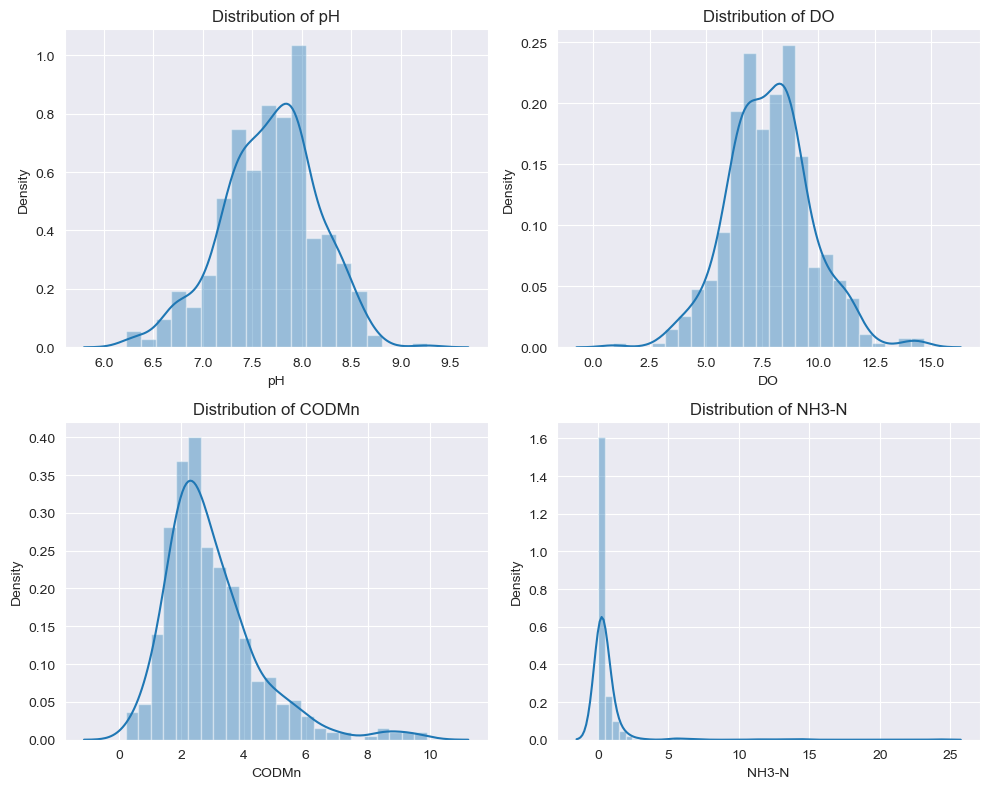

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个2x2的子窗口
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 设置Seaborn的样式
sns.set_style('darkgrid')

# 在每个子窗口中绘制distplot
sns.distplot(dataframe['pH'], ax=axes[0, 0])
sns.distplot(dataframe['DO'], ax=axes[0, 1])  
sns.distplot(dataframe['CODMn'], ax=axes[1, 0])  
sns.distplot(dataframe['NH3-N'], ax=axes[1, 1])  

# 设置每个子窗口的标题
axes[0, 0].set_title('Distribution of pH')
axes[0, 1].set_title('Distribution of DO')
axes[1, 0].set_title('Distribution of CODMn')
axes[1, 1].set_title('Distribution of NH3-N')

# 调整子窗口之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [71]:
from scipy.stats import kstest
import pandas as pd

# 将数据列中的字符串转换为数值类型
dataframe['pH'] = pd.to_numeric(dataframe['pH'], errors='coerce')
dataframe['DO'] = pd.to_numeric(dataframe['DO'], errors='coerce')
dataframe['CODMn'] = pd.to_numeric(dataframe['CODMn'], errors='coerce')
dataframe['NH3-N'] = pd.to_numeric(dataframe['NH3-N'], errors='coerce')

# 进行 Kolmogorov-Smirnov 检验
kstest_result = kstest(dataframe['pH'], cdf="norm")
print(kstest_result)
kstest_result = kstest(dataframe['DO'], cdf="norm")
print(kstest_result)
kstest_result = kstest(dataframe['CODMn'], cdf="norm")
print(kstest_result)
kstest_result = kstest(dataframe['NH3-N'], cdf="norm")
print(kstest_result)

KstestResult(statistic=0.9999999997514225, pvalue=0.0, statistic_location=6.22, statistic_sign=-1)
KstestResult(statistic=0.9953942615258671, pvalue=0.0, statistic_location=3.35, statistic_sign=-1)
KstestResult(statistic=0.8428566642773604, pvalue=0.0, statistic_location=1.5, statistic_sign=-1)
KstestResult(statistic=0.5096509158444275, pvalue=3.5766421322277903e-115, statistic_location=0.04, statistic_sign=-1)


In [73]:
dataframe.head()

,点位名称,断面情况,pH,DO,CODMn,NH3-N,本月,上月,主要污染指标
2003-06,四川攀枝花龙洞,干流,7.60,6.80,0.2,0.10,II,Ⅱ,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,II,Ⅱ,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,III,Ⅲ,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,II,Ⅱ,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,II,Ⅱ,NaN


从图和p-value的结果可以看出，拒绝H0（正态性）的假设，因此不能使用Pearson相关系数，直接使用Spearson相关系数

In [75]:
### 将不同污染等级和数字对应起来
quality = {'II':2, 'III':3, 'IV':4, 'I':1, 'V':5, '劣V':6, 'Ⅱ':2, 'Ⅲ':3, 'Ⅳ':4, '劣Ⅴ':6, 'Ⅰ':1, 'Ⅴ':5}
dataframe['本月'] = dataframe['本月'].map(quality)
dataframe['上月'] = dataframe['上月'].map(quality)

In [76]:
dataframe.head()

,点位名称,断面情况,pH,DO,CODMn,NH3-N,本月,上月,主要污染指标
2003-06,四川攀枝花龙洞,干流,7.60,6.80,0.2,0.10,2,2,NaN
2003-06,重庆朱沱,干流（川-渝省界）,7.63,8.41,2.8,0.34,2,2,NaN
2003-06,湖北宜昌南津关,干流（三峡水库出口）,7.07,7.81,5.8,0.55,3,3,NaN
2003-06,湖南岳阳城陵矶,干流,7.58,6.47,2.9,0.34,2,2,NaN
2003-06,江西九江河西水厂,干流（鄂-赣省界）,7.34,6.19,1.7,0.13,2,2,NaN


In [78]:
### 后续出现了中文字体显示的问题，添加这段代码，也可以在之前就设置好
import matplotlib.font_manager

# 获取系统中可用的字体列表
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 打印字体列表
for font_path in font_list:
    print(font_path)


C:\Windows\Fonts\YuGothB.ttc
C:\Windows\Fonts\BOD_PSTC.TTF
C:\Windows\Fonts\SNAP____.TTF
C:\Windows\Fonts\malgunbd.ttf
C:\Windows\Fonts\BSSYM7.TTF
C:\Windows\Fonts\STLITI.TTF
C:\Windows\Fonts\simhei.ttf
C:\Windows\Fonts\BRLNSR.TTF
C:\Windows\Fonts\BRADHITC.TTF
C:\Windows\Fonts\verdanab.ttf
C:\Windows\Fonts\STZHONGS.TTF
C:\Windows\Fonts\LTYPE.TTF
C:\Windows\Fonts\comic.ttf
C:\Windows\Fonts\corbell.ttf
C:\Windows\Fonts\IMPRISHA.TTF
C:\Windows\Fonts\NirmalaB.ttf
C:\Windows\Fonts\HARLOWSI.TTF
C:\Windows\Fonts\PERTILI.TTF
C:\Windows\Fonts\REFSPCL.TTF
C:\Windows\Fonts\TCB_____.TTF
C:\Windows\Fonts\georgiab.ttf
C:\Windows\Fonts\LCALLIG.TTF
C:\Windows\Fonts\SCRIPTBL.TTF
C:\Windows\Fonts\BELL.TTF
C:\Windows\Fonts\ROCKI.TTF
C:\Windows\Fonts\cambriab.ttf
C:\Windows\Fonts\segoeui.ttf
C:\Windows\Fonts\segoeuil.ttf
C:\Windows\Fonts\SHOWG.TTF
C:\Windows\Fonts\Candarali.ttf
C:\Windows\Fonts\BKANT.TTF
C:\Windows\Fonts\SegoeIcons.ttf
C:\Windows\Fonts\INFROMAN.TTF
C:\Windows\Fonts\PERI____.TTF
C:\Windows

最常用的微软雅黑：C:\Windows\Fonts\simhei.ttf

In [79]:
plt.style.use('seaborn') 
sns.set(rc={'figure.figsize': (8, 6)})  # 设置画板大小
sns.set(font='SimHei')  

             pH        DO     CODMn     NH3-N        本月        上月
pH     1.000000  0.429590  0.078306 -0.241574 -0.208519 -0.235415
DO     0.429590  1.000000 -0.093817 -0.183637 -0.391713 -0.378291
CODMn  0.078306 -0.093817  1.000000  0.223171  0.377517  0.253661
NH3-N -0.241574 -0.183637  0.223171  1.000000  0.715658  0.650016
本月    -0.208519 -0.391713  0.377517  0.715658  1.000000  0.672872
上月    -0.235415 -0.378291  0.253661  0.650016  0.672872  1.000000


<Axes: >

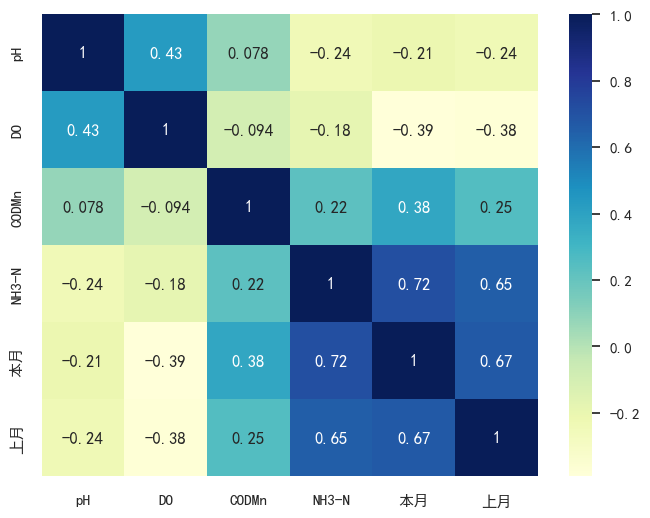

In [80]:
import pandas as pd
import seaborn as sns

# Spearman 相关性分析
corr = dataframe.corr(method='spearman')
print(corr)

# 绘制相关系数热力图
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [90]:
### 获得相关系数权重向量

cor_weights = corr['本月']
cor_weights = cor_weights[:4]
cor_weights.values

array([-0.20851915, -0.39171267,  0.37751671,  0.71565808])

In [102]:
### 使用该权重向量进行TOPSIS评价
# 1.获取数据矩阵
df = dataframe[['pH','DO', 'CODMn', 'NH3-N']]

# 2.标准化数据

def norm(X):
    return X/np.sqrt((X**2).sum())

norm_matrix = df.apply(norm)

# 3.加权变换
w_norm_matrix = norm_matrix*cor_weights

# 4.求解正负理想解
V_plus = w_norm_matrix.apply(max)
V_minus = w_norm_matrix.apply(min)

# 5.计算到正负理想解的距离
S_plus = np.sqrt(((w_norm_matrix - V_plus)**2).apply(sum, axis = 1))
S_minus = np.sqrt(((w_norm_matrix - V_minus)**2).apply(sum, axis = 1))

# 6.得到分数
p_score = S_minus/(S_plus + S_minus)
p_score

2003-06    0.040085
2003-06    0.046086
2003-06    0.075941
2003-06    0.053621
2003-06    0.046539
             ...   
2005-09    0.049488
2005-09    0.047283
2005-09    0.068710
2005-09    0.044428
2005-09    0.055457
Length: 476, dtype: float64

至此，每个月每个地区的综合评价分数已经得出了，对于区域水质污染情况，我们可以绘制热力图

In [119]:
from collections import Counter
# Counter函数可以得到一个字典，统计不同量出现的次数
print(Counter(dataframe['点位名称']).keys())
print(len(Counter(dataframe['点位名称']).keys()))

dict_keys(['四川攀枝花龙洞', '重庆朱沱', '湖北宜昌南津关', '湖南岳阳城陵矶', '江西九江河西水厂', '安徽安庆皖河口', '江苏南京林山', '四川乐山岷江大桥', '四川宜宾凉姜沟', '四川泸州沱江二桥', '湖北丹江口胡家岭', '湖南长沙新港', '湖南岳阳岳阳楼', '湖北武汉宗关', '江西南昌滁槎', '江西九江蛤蟆石', '江苏扬州三江营'])
17


['四川攀枝花龙洞', '重庆朱沱', '湖北宜昌南津关', '湖南岳阳城陵矶', '江西九江河西水厂', '安徽安庆皖河口', '江苏南京林山', '四川乐山岷江大桥', '四川宜宾凉姜沟', '四川泸州沱江二桥', '湖北丹江口胡家岭', '湖南长沙新港', '湖南岳阳岳阳楼', '湖北武汉宗关', '江西南昌滁槎', '江西九江蛤蟆石', '江苏扬州三江营']
28
['2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09']


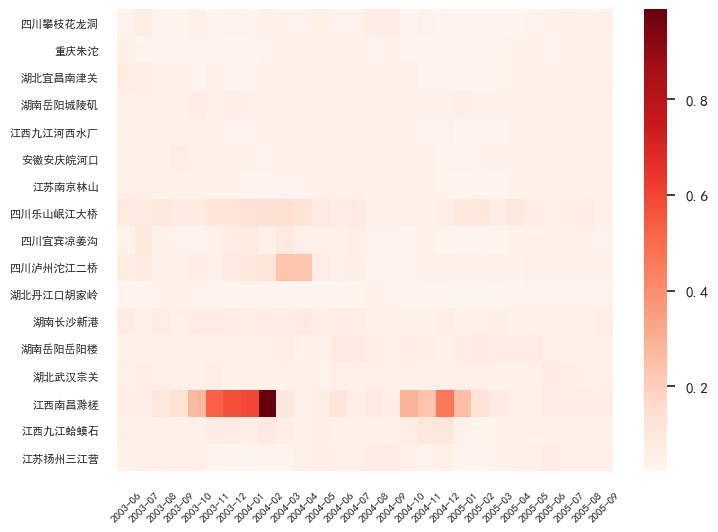

In [160]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

# 横轴是年月
arr = np.zeros((17, 28))  # 初始化热图大小（17个站点，28个月）
for i in range(17):
    for j in range(28):
        arr[i][j]=p_score[i+j*17]
y_ticks = location
print(y_ticks)
x_ticks = pd.date_range('2003-06', '2005-10', freq='m')  # 横轴刻度赋值
print(len(x_ticks))
x_ticks = ['%s-%02d' % (i.year, i.month) for i in x_ticks]  # 将横轴刻度值格式化为yyyy-mm形式
print(x_ticks)

plt.style.use('seaborn') 
sns.set(rc={'figure.figsize': (8, 6)})  # 设置画板大小
sns.set(font='SimHei')  

ax = sns.heatmap(arr, cmap='Reds')  # cmap=RdYlBu_r
ax.set_xticklabels(x_ticks, rotation=45, fontsize=8)
ax.set_yticklabels(y_ticks, rotation=360, fontsize=8)

plt.show()

这个热图的视觉效果不太好，可以将数据进行缩放后再绘制

In [164]:
p_score.max()

0.9884213969458315

In [166]:
p_score.min()

0.022933556636577108

In [167]:
p_score = (p_score-p_score.min())/(p_score.max()-p_score.min())
p_score

2003-06    0.017764
2003-06    0.023981
2003-06    0.054902
2003-06    0.031784
2003-06    0.024449
             ...   
2005-09    0.027504
2005-09    0.025220
2005-09    0.047413
2005-09    0.022263
2005-09    0.033687
Length: 476, dtype: float64

['四川攀枝花龙洞', '重庆朱沱', '湖北宜昌南津关', '湖南岳阳城陵矶', '江西九江河西水厂', '安徽安庆皖河口', '江苏南京林山', '四川乐山岷江大桥', '四川宜宾凉姜沟', '四川泸州沱江二桥', '湖北丹江口胡家岭', '湖南长沙新港', '湖南岳阳岳阳楼', '湖北武汉宗关', '江西南昌滁槎', '江西九江蛤蟆石', '江苏扬州三江营']
28
['2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09']


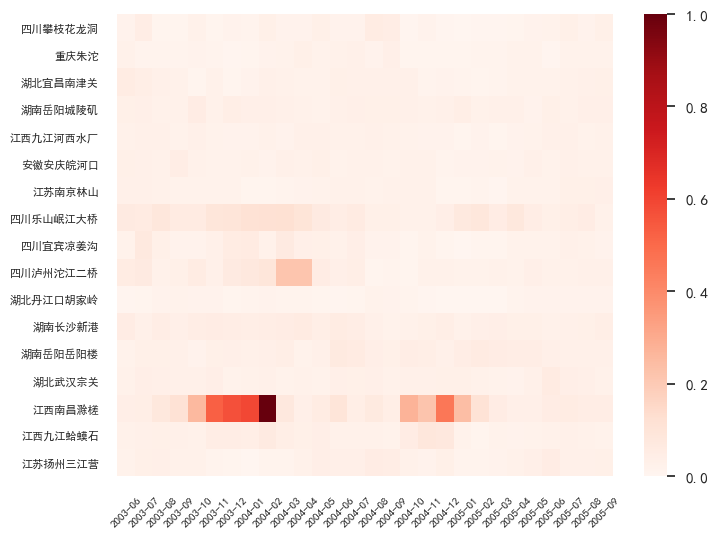

In [168]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

p_score

# 横轴是年月
arr = np.zeros((17, 28))  # 初始化热图大小（17个站点，28个月）
for i in range(17):
    for j in range(28):
        arr[i][j]=X_MinMax[i+j*17]
y_ticks = location
print(y_ticks)
x_ticks = pd.date_range('2003-06', '2005-10', freq='m')  # 横轴刻度赋值
print(len(x_ticks))
x_ticks = ['%s-%02d' % (i.year, i.month) for i in x_ticks]  # 将横轴刻度值格式化为yyyy-mm形式
print(x_ticks)

plt.style.use('seaborn') 
sns.set(rc={'figure.figsize': (8, 6)})  # 设置画板大小
sns.set(font='SimHei')  

ax = sns.heatmap(arr, cmap='Reds')  # cmap=RdYlBu_r
ax.set_xticklabels(x_ticks, rotation=45, fontsize=8)
ax.set_yticklabels(y_ticks, rotation=360, fontsize=8)

plt.show()

呃，结果好像一样啊，虽然热图表现不行，但是我们还是比较好计算的，因为这里分数越高代表污染程度越高，所以我们直接对每一行的分数进行求和，然后进行一个排序